<a href="https://colab.research.google.com/github/tkxksdl2/personal_project/blob/main/commerce6_%EA%B0%95%EC%84%B1%EB%AF%BC_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import selenium
import time
import bs4 as bs4
import pandas as pd
import webbrowser
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from urllib.request import urlopen
from urllib.parse import quote
import pandas as pd
# from webdriver_manager.chrome import ChromeDriverManager
ignored_exceptions=(StaleElementReferenceException)

def product_search(bookname):
    my_driver = webdriver.Chrome('C:/Users/tkxksdl2/Desktop/sf/chromedriver.exe') 
    my_url = "https://search.shopping.naver.com/search/all?query="
    my_driver.get(my_url+bookname) #my_url호출
    my_html=my_driver.page_source #페이지 긁어오기

    soup=bs4.BeautifulSoup(my_html,'html.parser') 

    item= soup.find_all('a',class_='basicList_link__1MaTN') #제목들 전체 찾기
    price=soup.find_all('span', class_='price_num__2WUXn' ) #가격들 전체 찾기
    url= soup.find_all('div',{'class':'basicList_title__3P9Q7'}) #링크들 전체 찾기
    item_list=[]
    price_list=[]
    url_list=[]
    for i in item:
        item_list.append(i.text)
    for i in price:
        price_list.append(i.text)
    for i in url:
        links = i.find_all('a', href=True) 
        for link in links:
            url_list.append(link['href'])

    columns=['책제목','가격','링크']
    # pd.DataFrame({'책제목':item_list,'가격':price_list,'링크':url_list},index=[1,2,3,4,5])
    df_booksearch = pd.DataFrame(list(zip(item_list,price_list,url_list)),columns=columns)
    print("검색한 도서의 상위 5가지를 보여드리겠습니다.")
    display(df_booksearch)
    question = int(input("해당 링크를 열어보시려면 1 아니면 2 입력:"))
    if question == 2:
        print("나감")
        # function_product_purchase()
        return
    elif question == 1:
        bnum = int(input("찾아보실 번호를 입력해주세요:"))
        my_driver.get('about:blank')
        try:
            my_driver.get(df_booksearch['링크'][bnum])
        except:
            pass

    q = quote(bookname)

    # 블로그 최상단 리뷰 오픈
    url = urlopen("https://search.naver.com/search.naver?query="+q+'&where=blog')
    bs0bj = BeautifulSoup(url.read(),'html.parser')
    bs = bs0bj.find('a',class_="api_txt_lines total_tit")
    
    my_driver.execute_script("window.open('about:blank', 'tab2');")
    my_driver.switch_to.window("tab2")
    my_driver.get(bs.attrs['href'])

    # 유튜브 최상단 리뷰
    find= 'https://www.youtube.com/'
    my_driver.execute_script("window.open('about:blank', 'tab3');")
    my_driver.switch_to.window("tab3")
    my_driver.get(find)

    my_driver.maximize_window()

    bname=my_driver.find_element_by_name("search_query")
    bname.send_keys(bookname+' review')
    bname.find_element_by_xpath('//*[@id="search-icon-legacy"]').click()
    time.sleep(5)
    bname.find_element_by_xpath('//*[@id="search-icon-legacy"]').send_keys(Keys.ENTER)
    time.sleep(5)

    source = my_driver.page_source
    soup = BeautifulSoup(source,'html.parser')

    titles=[]
    titles=soup.select("a[id=video-title]")
    my_driver.get("https://www.youtube.com/"+titles[0].get('href'))



In [ ]:

#메일작성

class Commerce_share:
    def __init__(self, df_c, df_p):
       self.df_c = df_c.reset_index()
       self.df_p = df_p
        

    def Commerce_proceed(self):
        import time
        print('알림 메일을 전송하겠습니다. 잠시만 기다려주세요!')
        
        self.send_email()  
        self.recommand_to_you()

        input('이용해주셔서 감사합니다!! 종료하려면 아무 키나 입력하세요!\n') 
        return

    def send_email(self):
        import smtplib #이메일
        import time #시간
        from email.mime.multipart import MIMEMultipart
        from email.mime.text import MIMEText
        #now = time.strftime('%Y-%m-%d', time.localtime(time.time())) #현재날짜
        self.email = self.df_c['email'][0]

        sender="a01058303550@gmail.com"
        receivers = self.email

        msg=MIMEMultipart('alternative') #HTML이나 plain text사용 시 사용 #default:mixed-> mixed default:일반텍스트

        msg['Subject']='구매영수증발급'
        msg['From']=sender
        msg['To']=receivers

        html= self.html_content()

        msg1=MIMEText(html,'html')

        msg.attach(msg1)


        smtp=smtplib.SMTP(host='smtp.gmail.com', port=587)
        smtp.ehlo()
        smtp.starttls()
        smtp.login('a01058303550@gmail.com','pwzeiqfeyejcdzzl')
        smtp.sendmail(sender,receivers, msg.as_string())
        
        print("\n{} 로 정상적으로 이메일이 발송되었습니다!".format( receivers ))

        smtp.quit()

    def html_content(self):
        now = time.strftime('%Y-%m-%d', time.localtime(time.time()))
        name =  self.df_c['id'][0]
        b_name_count = len(self.df_p)

        b_name = self.df_p.reset_index()['Name'][0]

        b_cost = self.df_p['Price'].sum()
        adress = self.df_c['location'][0]
        return '''<html>
        <head></head>
        <body>
        <table align="center" width="622" border="0" cellpadding="0" cellspacing="0">
        <tbody><tr><td><a href="http://www.aladin.co.kr" target="_blank" rel="noreferrer noopener">
        <img src="http://image.aladin.co.kr/img/mail/AladdinNews/Automail/automail_header_01.jpg" border="0" loading="lazy"></a></td></tr> 
        <tr>
        <td align="center">
            <table align="center" width="562" border="0" cellpadding="0" cellspacing="0">  
        <td style="font:bold 27px 'Apple SD Gothic Neo','malgun gothic','dotum';letter-spacing:-4px; color:#3161ce; padding:30px 0 18px 0; line-height:35px;text-align:left;">주문을 <span style="color: #e62e8b">접수</span>하였습니다 </td></table></tr>
          <tr><td colspan="2" style="font:12px 'Apple SD Gothic Neo','dotum';color:#333333; padding:0 0 15px 0; line-height:19px;text-align:left;">알라딘을 이용해 주셔서 정말 감사합니다.<br><strong>{}</strong>님께서 주문하신 내역에 대한 <strong>주문접수</strong> 확인 메일입니다.</td></tr>
          </tbody></table>
        <table align="center" width="562" border="0" cellpadding="0" cellspacing="0"><tbody><tr><td style="font:bold 17px 'malgun gothic','dotum';color:#3161ce; text-align:left; padding:15px 0 5px 0; letter-spacing:-1px">주문내역</td></tr></tbody></table>
        <table align="center" width="562" border="0" cellpadding="0" cellspacing="0"><tbody><tr><td align="center" style="BORDER-BOTTOM:#3161ce 1px solid;BORDER-LEFT:#3161ce 1px solid;BORDER-TOP:#3161ce 1px solid;BORDER-RIGHT:#3161ce 1px solid; padding:15px; background:#f4f4f4"><table align="left" width="100%" border="0" cellpadding="0" cellspacing="0"><tbody><tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">주문일</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">{}&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">주문번호</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">001-A720893167&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">상 태</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">상품준비중&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">상품이름</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">{} 등 {} 권 &nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">상품가격</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">{},000 원&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">배 송 료</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">0 원&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;color:#000000; font:12px 'dotum';text-align:left; width:140px">주문총액</td><td style="padding:10px 0 10px 20px;color:#000000; font:12px 'dotum';text-align:left;">{},000 원&nbsp;</td></tr>
        <tr><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left; width:140px">배송주소</td><td style="padding:10px 0 10px 20px;border-bottom:1px solid #e6e6e6; color:#333333;font:12px 'dotum';text-align:left;">{} &nbsp;</td></tr>
        </tbody></table></td></tr></tbody></table>
        </tbody></table>
        </body>
    </html>'''.format(name, now, b_name, b_name_count, b_cost, b_cost, adress)

    def recommand_to_you(self):
        import pandas as pd
        from sklearn.feature_extraction.text import CountVectorizer
        from sklearn.metrics.pairwise import cosine_similarity
        b_name = self.df_p.reset_index()['Name'][0]
        print('구매하신 책이 {} 이군요! 이런 책들은 어떠세요? '.format(b_name))
        print('비슷한 제목의 책들을 평점순으로 나열해봤어요!\n')
        

        df = pd.read_csv('C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/product/product/bestsellers with categories.csv')
        count_vect = CountVectorizer(ngram_range = (1,3))
        
        c_vect_Name = count_vect.fit_transform(df['Name'])

        target_index = df[df['Name'] == b_name].index.values
        
        name_c_sim = cosine_similarity(c_vect_Name,c_vect_Name).argsort()[:,::-1]

        sim_index = name_c_sim[target_index , : 30 ].reshape(-1)
        sim_index = sim_index[ sim_index != target_index]

        result = df.iloc[sim_index].sort_values('User Rating', ascending = False)[:10]
        print(result)


In [ ]:
class purchase:
  import pandas as pd
  import numpy as np

  def __init__(self, df_c, df_p):
    self.df_c = df_c
    self.df_p = df_p
  


  def purchase_proceed(self):
    for i in range(len(self.df_p)):
      df_save = self.data_convert(self.df_c, self.df_p.iloc[[i],:])
      self.csv_file_insert(df_save)
  
      print('구매가 정상적으로 완료되었습니다!\n ------------------------------')    
      self.send_df_to_share(self.df_c, self.df_p)

 
  def data_convert(self, df_c, df_p):
    df_temp = pd.concat([df_c.reset_index(), df_p.reset_index()], axis=1)
    df_save = df_temp[['id','location','Name','Author','Price']]

    print('\n다음 내역이 결제내역에 저장됩니다.\n  ',df_save)

    return df_save

  def csv_file_insert(self, df_save):
    import pandas as pd 
    df_save.to_csv("C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/purchase/purchase.csv", mode='a',header=False, index=False)


  def send_df_to_share(self, df_c, df_p):
    C = Commerce_share(df_c, df_p)
    C.Commerce_proceed()


In [ ]:
import numpy as np
import pandas as pd
import time
import os

pd.options.display.max_columns = None
pd.options.display.width = 10000


product_df = pd.read_csv('C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/product/product/bestsellers with categories.csv')
product_df['책번호'] = np.arange(1, len(product_df) + 1)

class product:
    product_purchase = pd.DataFrame(columns=product_df.columns)
    product_search = pd.DataFrame(columns=product_df.columns)
    search_list_index = []
    check_point = 0
    answer = 0

    def __init__(self, df_c):
        self.df_c = df_c

    def sort_product(self):
        while True:
            print(product_df)

            try:
                self.answer = int(input('\n1) 책 제목 검색 2) 작가 검색 3) 정렬 설정 4) 바로 구매 5) 장바구니 관리 6) 종료 \n'))
            except:
                print('잘못 입력하셨습니다. 초기화면으로 돌아갑니다.!')
                time.sleep(2)

            if self.answer == 1:  # 책 제목 검색
                self.display_purchase_list()

            elif self.answer == 2:  # 작가로 검색
                self.display_purchase_list()

            elif self.answer == 3:  # 정렬 옵션
                self.function_product_sort()

            elif self.answer == 4:  # 바로 구매
                self.function_product_purchase()

            elif self.answer == 5: # 장바구니 관리
                self.purchase_list_control()

            elif self.answer == 6:  # 종료 옵션
                if len(product.product_purchase) == 0:
                    print('찾아주셔서 감사합니다!')
                    return
                else:
                    self.purchase_list()
                    break

            else:
                print('잘못 입력하셨습니다.')
                time.sleep(2)

            if self.check_point == 1:
                break

            self.search_list_index = []  # 검색 index 저장 list 초기화
            self.product_search.drop(self.product_search.index, inplace=True)#초기화변경사항




    def display_purchase_list(self):#### 구매결과 1단계
        if self.answer == 1:
            book_name_answer = input('제목을 입력해주세요 : ')

            # for book_name in list(product_df['Name']):
            # self.search_list_index.append(product_df[product_df.Name == book_name]['책번호'][1])
            self.search_list_index = product_df[list(product_df['Name'].str.contains(book_name_answer))]['책번호'].values
            self.display_purchase_list_2()


        elif self.answer == 2:
            author_name_answer = input('작가 이름을 입력해주세요 : ')

            self.search_list_index = product_df[list(product_df['Author'].str.contains(author_name_answer))]['책번호'].values
            self.display_purchase_list_2()


        self.product_search = pd.DataFrame(columns=product_df.columns)  # 초기화

    def display_purchase_list_2(self): ##### 구매결과 2단계
        if len(self.search_list_index) == 0:
            print('-----------------------')
            print('---검색 결과가 없습니다----')
            print('-----------------------')
            print('--초기화면으로 돌아갑니다--')
            print('------------------------')
            time.sleep(2)
        else:
            print('---검색결과---')
            for i in range(len(self.search_list_index)):
                product.product_search = product.product_search.append(
                    product_df[product_df['책번호'] == self.search_list_index[i]])
            print(product.product_search)

            self.function_product_purchase()




    def function_product_purchase(self):#### 구매 확인합니다.

        try:
            number = int(input('구매를 원하신다면 뒤쪽의 책 번호를 입력해주세요. 이전 검색으로 돌아가시려면 0을 입력해주세요 \n'))

            if self.answer == 1 or self.answer == 2:
                if number != 0 and number in self.search_list_index:

                    ## selenium input??   입력할 데이터프레임 : product_df[product_df['책번호'] == number]
                    if input('해당 도서에 대해 더 자세한 정보를 보실래요??(Y/N)\n') =='Y':
                        product_search( product_df[product_df['책번호'] == number]['Name'].values[0])

                    product.product_purchase = product.product_purchase.append(product_df[product_df['책번호'] == number])
                    print('-----현재 장바구니 목록-----\n{}'.format(product.product_purchase))

                    EXIT_Search = input('구매 화면으로 이동하시겠습니까?(Y / N : 검색 화면으로 돌아갑니다)\n ')

                    if EXIT_Search == 'Y' or EXIT_Search == 'y':
                        self.check_point = 1
                        self.purchase_list()

                    elif EXIT_Search != 'N' and EXIT_Search != 'n':
                        print('잘못 입력하셨습니다. 초기 화면으로 돌아갑니다.')
                        time.sleep(2)

                elif number != 0:
                    print('잘못 입력하셨습니다. 초기 화면으로 돌아갑니다.')
                    time.sleep(2)

            elif self.answer == 3 or self.answer == 4:
                if number != 0 and number in list(product_df['책번호']):

                    ## selenium input??   입력할 데이터프레임 : product_df[product_df['책번호'] == number]
                    
                    if input('해당 도서에 대해 더 자세한 정보를 보실래요??(Y/N)\n') =='Y':
                      product_search(product_df[product_df['책번호'] == number]['Name'].values[0])

                    product.product_purchase = product.product_purchase.append(product_df[product_df['책번호'] == number])
                    print('-----현재 장바구니 목록-----\n{}'.format(product.product_purchase))

                    EXIT_Search = input('구매 화면으로 이동하시겠습니까?(Y / N : 검색 화면으로 돌아갑니다)\n')

                    if EXIT_Search == 'Y' or EXIT_Search == 'y':
                        self.check_point = 1
                        self.purchase_list()

                    elif EXIT_Search != 'N' and EXIT_Search != 'n':
                        print('잘못 입력하셨습니다. 초기 화면으로 돌아갑니다.')
                        time.sleep(2)
        except:
            print('잘못 입력하셨습니다. 초기 화면으로 돌아갑니다.')
            time.sleep(2)




    def purchase_list_control(self): # 장바구니 관리
        print(product.product_purchase)
        delete_number = int(input('제거할 책의 번호를 입력해주세요 : '))

        if delete_number in product.product_purchase['책번호'].values:
            product.product_purchase.drop(product.product_purchase.index[product.product_purchase['책번호'] == delete_number], axis=0, inplace=True)
            print('--현재 장바구니--')
            print(product.product_purchase)
            time.sleep(2)
            print('초기화면으로 돌아갑니다.')
            time.sleep(1)

        else:
            print('잘못 입력하셨습니다. 초기 화면으로 돌아갑니다.')

    def purchase_list(self):
        print('\n\n\n\n\n\n\n')
        print('-----장바구니 목록-----')
        print(product.product_purchase.sort_values(['책번호']))
        print('다음 사람 영역-------------------------------------------------------')
        df_p = product.product_purchase##
        product.product_purchase = pd.DataFrame(columns=product_df.columns)

        p = purchase(self.df_c, df_p)
        p.purchase_proceed()

    def function_product_sort(self):
        select_number = int(input('정렬 순서 : 1) 이름순 2) 작가순 3) 평점높은순 4) 리뷰높은순 5) 가격낮은순 6) 처음 index순\n'))

        if select_number == 1:
            product_df.sort_values('Name', inplace=True)
        elif select_number == 2:
            product_df.sort_values('Author', inplace=True)
        elif select_number == 3:
            product_df.sort_values('User Rating', ascending=False, inplace=True)
        elif select_number == 4:
            product_df.sort_values('Reviews', ascending=False, inplace=True)
        elif select_number == 5:
            product_df.sort_values('Price', ascending=True, inplace=True)
        elif select_number == 6:
            product_df.sort_values('책번호', inplace=True)
        else:
            print('잘못 입력하셨습니다. 처음으로 돌아갑니다.')
            time.sleep(2)


#a = product('홍승우', 1234)
#a.sort_product()


In [ ]:
import csv
import pandas as pd
import numpy as np
##csv파일 불러오기
login_data_path = "C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/login/login/user_db.csv"
class Commerce6_login :
  #모드 선택 함수
  def mode_select(self):
      mode_num = int(input("1:로그인 2: 회원가입 3:비밀번호 찾기 4:비밀번호 변경 5:종료"))
      if mode_num==1:
        self.login_doit()
      elif mode_num==2:
        Commerce6_login.sign_in()
      elif mode_num==3:
        self.Pw_find()
      elif mode_num==4:
        self.Pw_change()
      elif mode_num==5:
        print("종료합니다.")

  #로그인
  def login_doit(self) :
      login_df = pd.read_csv(login_data_path)
      count=0
      print('아이디를 입력하세요')
      ID=input()
      print('비밀번호를 입력하세요')
      Password=input()
      for i in range(len(login_df)):
        if login_df.loc[i, 'id'] == ID :
          if login_df.loc[i, 'pw'] == Password:
            print('{}님 로그인 되셨습니다.'.format(login_df.loc[i, 'id']))
            if self.secure_image():
              df_c = (login_df.iloc[[i], :])   ##로그인 한 사람의 정보 저장
              #return df_c
              print(df_c)
              P = product(df_c)  ##########검색 모듈 불러오기#########
              P.sort_product()  
              break
            else:
              print('보안문자 실패! 시스템을 종료합니다.')
              break

          else:
            print('Password Error')
            break
        else:
          count+=1    
      if count==len(login_df):
        print('ID Error')

  #회원가입
  def sign_in() :
    login_df = pd.read_csv(login_data_path)
    f= open(login_data_path, 'a', newline='',encoding='utf-8-sig')
    wr= csv.writer(f)
    while True:
      id= input("사용하실 아이디를 입력하세요 ")
      id_list=login_df.loc[:,'id'].values.tolist()
      #아이디 중복 확인
      if (id in id_list):
        print("이미 사용중인 아이디 입니다.")
        continue
      else:
        pw= input("사용하실 비밀번호를 입력하세요 ")
        nickname= input("사용하실 닉네임을 입력하세요 ")
        location= input("주소를 입력하세요 ")
        email=input("이메일을 입력하세요 ")
        question=input("비밀번호를 찾기 위한 질문을 입력하세요")
        answer=input("질문의 답을 입력하세요")
        break
    wr.writerow([id, pw, nickname, location,email,question,answer])
    f.close() 


  def Pw_find(self) :
      login_df = pd.read_csv(login_data_path)
      #아이디와 비밀번호 찾기 문답 리스트화
      id_list=login_df.loc[:,'id'].values.tolist()
      question_list=login_df.loc[:,'question'].values.tolist()
      answer_list=login_df.loc[:,'answer'].values.tolist()
      print('아이디를 입력하세요')
      ID=input()
      if ID in id_list:
        print(question_list[id_list.index(ID)])
        input_answer=input()
        if input_answer == answer_list[id_list.index(ID)]:
          print("본인확인 되었습니다.")
          #임시비밀번호 생성
          temp_pw=str(np.random.randint(1000,9999))  
          print("다음의 임시 비밀번호로 로그인 하세요: {}".format(temp_pw))
          #csv에 변경된 비밀번호로 저장
          login_df.loc[id_list.index(ID),'pw']=temp_pw
          login_df.to_csv(login_data_path,index=False)
          
        else:
          print("본인확인에 실패하였습니다.")
      else:
        print("없는 아이디 입니다.")

  #비밀번호 변경
  def Pw_change(self):
    login_df = pd.read_csv(login_data_path)
    #아이디와 비밀번호 리스트화
    id_list=login_df.loc[:,'id'].values.tolist()
    pw_list=login_df.loc[:,'pw'].values.tolist()
    print('아이디를 입력하세요')
    ID=input()
    if ID in id_list:
      print('비밀번호를 입력하세요')
      Password=input()
      if Password == pw_list[id_list.index(ID)]:
        print('변경하실 비밀번호를 입력하세요')
        new_password=input() 
        print("비밀번호가 {}로 변경되었습니다.".format(new_password))
        #csv에 변경된 비밀번호로 저장
        login_df.loc[id_list.index(ID),'pw']=new_password
        login_df.to_csv(login_data_path,index=False)
      else:
        print('비밀번호가 틀렸습니다')
    else:
      print('없는 아이디 입니다.')  




  def secure_image(self):
    from PIL import Image
    from IPython.display import Image as image_
    import numpy as np
    import time
    print('보안문자 확인을 시작합니다.\n')
    time.sleep(2)

    i_base = Image.open('C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/login/image_login/base.png')
    i_base = i_base.resize((300,150))
    num_list = []
    correct_answer = ''

    for i in range(4):
      num_list.append(np.random.randint(0,10))
    for i,j in enumerate(num_list):
      i_temp = Image.open("C:/Users/tkxksdl2/Desktop/새 폴더/commerce_mine/login/image_login/{}.png".format(j))
      i_temp = i_temp.rotate(np.random.randint(-90,130), fillcolor='white')
      i_base.paste(i_temp,(45 + i*50 ,40) )
      correct_answer = correct_answer + str(j) 
    
    display(i_base)
    time.sleep(2)

    ans = input('숫자를 차례로 입력하세요.\n')
    time.sleep(1)
    if ans == correct_answer:
      return True
    else:
      return False

###로그인한 사람의 정보
#custom_data_send=login_doit()
#print(custom_data_send)

아이디를 입력하세요
비밀번호를 입력하세요
이준석님 로그인 되셨습니다.
보안문자 확인을 시작합니다.



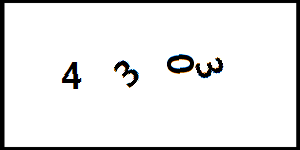

    id    pw     nickname    location                  email   question answer
1  이준석  1234  bicycle_guy  서울특별시 영등포구  tkxksdl2@likelion.org  좋아하는 계절은?      봄
                                                  Name         Author  User Rating  Reviews  Price  Year        Genre  책번호
431                                 The Magnolia Story    Chip Gaines          4.9     7861      5  2016  Non Fiction  432
87   Dog Man: Lord of the Fleas: From the Creator o...     Dav Pilkey          4.9     5470      6  2018      Fiction   88
85   Dog Man: Fetch-22: From the Creator of Captain...     Dav Pilkey          4.9    12619      8  2019      Fiction   86
84   Dog Man: Brawl of the Wild: From the Creator o...     Dav Pilkey          4.9     7235      4  2019      Fiction   85
83   Dog Man: Brawl of the Wild: From the Creator o...     Dav Pilkey          4.9     7235      4  2018      Fiction   84
..                                                 ...            ...          ...      ...    ...   ...

In [ ]:
##실제구동부문
server = Commerce6_login()
server.mode_select()